# MNIST - Ван Дин
- Total 70,000 graphics
- Train(60,000), test(10,000)
- All images are 28 x 28 grayscale graphics (1 channel)
- 10 categories, each category represents a number between 0 and 9
- Each graph contains **one** handwritten number

## Download the Dataset and plot the images in the Dataset

### Download Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

batch_size=100

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                      train=True, 
                      transform=transforms.ToTensor(),  
                      download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                      batch_size=batch_size,
                      shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                      batch_size=batch_size,
                      shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Plot the images in the train_loader

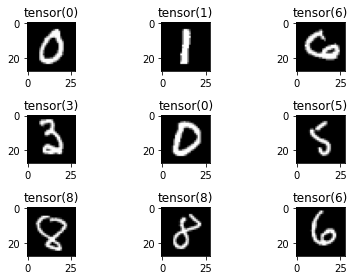

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(9):
    plt.subplot(3,3,i+1).set_title(labels[i])
    plt.imshow(images[i][0], 'gray')

plt.tight_layout()
plt.show()

### Plot the images in the test_loader

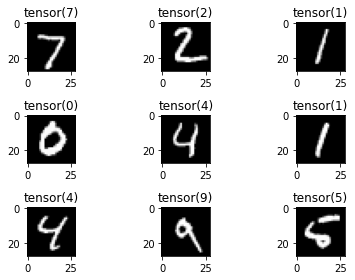

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

for i in range(9):
    plt.subplot(3,3,i+1).set_title(labels[i])
    plt.imshow(images[i][0], 'gray')

plt.tight_layout()
plt.show()

## Neural network

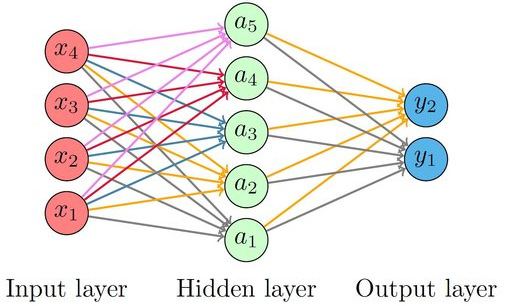

### Fully connected neural network with one hidden layer

In [ ]:
import torch
import torch.nn as nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28 * 28
hidden_size = 500
num_classes = 10

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


#### num_epochs = 5

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/5], Step [100/600], Loss: 0.2509
Epoch [1/5], Step [200/600], Loss: 0.0918
Epoch [1/5], Step [300/600], Loss: 0.3112
Epoch [1/5], Step [400/600], Loss: 0.1818
Epoch [1/5], Step [500/600], Loss: 0.0984
Epoch [1/5], Step [600/600], Loss: 0.1309
Epoch [2/5], Step [100/600], Loss: 0.1666
Epoch [2/5], Step [200/600], Loss: 0.0630
Epoch [2/5], Step [300/600], Loss: 0.1595
Epoch [2/5], Step [400/600], Loss: 0.0909
Epoch [2/5], Step [500/600], Loss: 0.0940
Epoch [2/5], Step [600/600], Loss: 0.1297
Epoch [3/5], Step [100/600], Loss: 0.0431
Epoch [3/5], Step [200/600], Loss: 0.0239
Epoch [3/5], Step [300/600], Loss: 0.0672
Epoch [3/5], Step [400/600], Loss: 0.0197
Epoch [3/5], Step [500/600], Loss: 0.0271
Epoch [3/5], Step [600/600], Loss: 0.1132
Epoch [4/5], Step [100/600], Loss: 0.0910
Epoch [4/5], Step [200/600], Loss: 0.0282
Epoch [4/5], Step [300/600], Loss: 0.0674
Epoch [4/5], Step [400/600], Loss: 0.0926
Epoch

#### num_epochs = 10

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.2997
Epoch [1/10], Step [200/600], Loss: 0.2715
Epoch [1/10], Step [300/600], Loss: 0.3090
Epoch [1/10], Step [400/600], Loss: 0.2462
Epoch [1/10], Step [500/600], Loss: 0.1974
Epoch [1/10], Step [600/600], Loss: 0.0401
Epoch [2/10], Step [100/600], Loss: 0.1607
Epoch [2/10], Step [200/600], Loss: 0.0518
Epoch [2/10], Step [300/600], Loss: 0.1774
Epoch [2/10], Step [400/600], Loss: 0.0800
Epoch [2/10], Step [500/600], Loss: 0.0997
Epoch [2/10], Step [600/600], Loss: 0.0934
Epoch [3/10], Step [100/600], Loss: 0.0551
Epoch [3/10], Step [200/600], Loss: 0.0563
Epoch [3/10], Step [300/600], Loss: 0.2230
Epoch [3/10], Step [400/600], Loss: 0.0928
Epoch [3/10], Step [500/600], Loss: 0.0968
Epoch [3/10], Step [600/600], Loss: 0.0198
Epoch [4/10], Step [100/600], Loss: 0.0403
Epoch [4/10], Step [200/600], Loss: 0.0372
Epoch [4/10], Step [300/600], Loss: 0.0973
Epoch [4/10], Step [400/600], Loss: 0.0427
Epoch [4/10], Step [500/600], Loss: 0.0231
Epoch [4/10

#### num_epochs = 15

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/15], Step [100/600], Loss: 0.4217
Epoch [1/15], Step [200/600], Loss: 0.1595
Epoch [1/15], Step [300/600], Loss: 0.2061
Epoch [1/15], Step [400/600], Loss: 0.0922
Epoch [1/15], Step [500/600], Loss: 0.2457
Epoch [1/15], Step [600/600], Loss: 0.1195
Epoch [2/15], Step [100/600], Loss: 0.1266
Epoch [2/15], Step [200/600], Loss: 0.0947
Epoch [2/15], Step [300/600], Loss: 0.0891
Epoch [2/15], Step [400/600], Loss: 0.0838
Epoch [2/15], Step [500/600], Loss: 0.1396
Epoch [2/15], Step [600/600], Loss: 0.0483
Epoch [3/15], Step [100/600], Loss: 0.0383
Epoch [3/15], Step [200/600], Loss: 0.1001
Epoch [3/15], Step [300/600], Loss: 0.0352
Epoch [3/15], Step [400/600], Loss: 0.0839
Epoch [3/15], Step [500/600], Loss: 0.0545
Epoch [3/15], Step [600/600], Loss: 0.0766
Epoch [4/15], Step [100/600], Loss: 0.0347
Epoch [4/15], Step [200/600], Loss: 0.0658
Epoch [4/15], Step [300/600], Loss: 0.0568
Epoch [4/15], Step [400/600], Loss: 0.0516
Epoch [4/15], Step [500/600], Loss: 0.0733
Epoch [4/15

#### num_epochs = 20

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/20], Step [100/600], Loss: 0.4794
Epoch [1/20], Step [200/600], Loss: 0.1450
Epoch [1/20], Step [300/600], Loss: 0.2259
Epoch [1/20], Step [400/600], Loss: 0.1950
Epoch [1/20], Step [500/600], Loss: 0.1952
Epoch [1/20], Step [600/600], Loss: 0.1261
Epoch [2/20], Step [100/600], Loss: 0.0810
Epoch [2/20], Step [200/600], Loss: 0.0607
Epoch [2/20], Step [300/600], Loss: 0.0587
Epoch [2/20], Step [400/600], Loss: 0.0491
Epoch [2/20], Step [500/600], Loss: 0.2058
Epoch [2/20], Step [600/600], Loss: 0.0860
Epoch [3/20], Step [100/600], Loss: 0.1582
Epoch [3/20], Step [200/600], Loss: 0.0530
Epoch [3/20], Step [300/600], Loss: 0.0521
Epoch [3/20], Step [400/600], Loss: 0.1209
Epoch [3/20], Step [500/600], Loss: 0.0599
Epoch [3/20], Step [600/600], Loss: 0.0431
Epoch [4/20], Step [100/600], Loss: 0.0204
Epoch [4/20], Step [200/600], Loss: 0.0221
Epoch [4/20], Step [300/600], Loss: 0.0382
Epoch [4/20], Step [400/600], Loss: 0.0665
Epoch [4/20], Step [500/600], Loss: 0.0138
Epoch [4/20

### Fully connected neural network with two hidden layers

#### num_epochs = 5

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2) 
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)  

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.5604
Epoch [1/5], Step [200/600], Loss: 0.2050
Epoch [1/5], Step [300/600], Loss: 0.2398
Epoch [1/5], Step [400/600], Loss: 0.1867
Epoch [1/5], Step [500/600], Loss: 0.0792
Epoch [1/5], Step [600/600], Loss: 0.1244
Epoch [2/5], Step [100/600], Loss: 0.1334
Epoch [2/5], Step [200/600], Loss: 0.0862
Epoch [2/5], Step [300/600], Loss: 0.0677
Epoch [2/5], Step [400/600], Loss: 0.0301
Epoch [2/5], Step [500/600], Loss: 0.2389
Epoch [2/5], Step [600/600], Loss: 0.0793
Epoch [3/5], Step [100/600], Loss: 0.0315
Epoch [3/5], Step [200/600], Loss: 0.0414
Epoch [3/5], Step [300/600], Loss: 0.1036
Epoch [3/5], Step [400/600], Loss: 0.0353
Epoch [3/5], Step [500/600], Loss: 0.0295
Epoch [3/5], Step [600/600], Loss: 0.0290
Epoch [4/5], Step [100/600], Loss: 0.1237
Epoch [4/5], Step [200/600], Loss: 0.0869
Epoch [4/5], Step [300/600], Loss: 0.0845
Epoch [4/5], Step [400/600], Loss: 0.1997
Epoch [4/5], Step [500/600], Loss: 0.0621
Epoch [4/5], Step [600/600], Loss:

#### num_epochs = 10

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2) 
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)  

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.2588
Epoch [1/10], Step [200/600], Loss: 0.2415
Epoch [1/10], Step [300/600], Loss: 0.1681
Epoch [1/10], Step [400/600], Loss: 0.1430
Epoch [1/10], Step [500/600], Loss: 0.1660
Epoch [1/10], Step [600/600], Loss: 0.0506
Epoch [2/10], Step [100/600], Loss: 0.0444
Epoch [2/10], Step [200/600], Loss: 0.1727
Epoch [2/10], Step [300/600], Loss: 0.0677
Epoch [2/10], Step [400/600], Loss: 0.0821
Epoch [2/10], Step [500/600], Loss: 0.0632
Epoch [2/10], Step [600/600], Loss: 0.0703
Epoch [3/10], Step [100/600], Loss: 0.0307
Epoch [3/10], Step [200/600], Loss: 0.0344
Epoch [3/10], Step [300/600], Loss: 0.0168
Epoch [3/10], Step [400/600], Loss: 0.0156
Epoch [3/10], Step [500/600], Loss: 0.0817
Epoch [3/10], Step [600/600], Loss: 0.1669
Epoch [4/10], Step [100/600], Loss: 0.0434
Epoch [4/10], Step [200/600], Loss: 0.0638
Epoch [4/10], Step [300/600], Loss: 0.0549
Epoch [4/10], Step [400/600], Loss: 0.0036
Epoch [4/10], Step [500/600], Loss: 0.0166
Epoch [4/10

#### num_epochs = 15

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2) 
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)  

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/15], Step [100/600], Loss: 0.3719
Epoch [1/15], Step [200/600], Loss: 0.2592
Epoch [1/15], Step [300/600], Loss: 0.1222
Epoch [1/15], Step [400/600], Loss: 0.2211
Epoch [1/15], Step [500/600], Loss: 0.1013
Epoch [1/15], Step [600/600], Loss: 0.1111
Epoch [2/15], Step [100/600], Loss: 0.0560
Epoch [2/15], Step [200/600], Loss: 0.1186
Epoch [2/15], Step [300/600], Loss: 0.1192
Epoch [2/15], Step [400/600], Loss: 0.0270
Epoch [2/15], Step [500/600], Loss: 0.1130
Epoch [2/15], Step [600/600], Loss: 0.1487
Epoch [3/15], Step [100/600], Loss: 0.0410
Epoch [3/15], Step [200/600], Loss: 0.1079
Epoch [3/15], Step [300/600], Loss: 0.0573
Epoch [3/15], Step [400/600], Loss: 0.0690
Epoch [3/15], Step [500/600], Loss: 0.0172
Epoch [3/15], Step [600/600], Loss: 0.0485
Epoch [4/15], Step [100/600], Loss: 0.0234
Epoch [4/15], Step [200/600], Loss: 0.0377
Epoch [4/15], Step [300/600], Loss: 0.0367
Epoch [4/15], Step [400/600], Loss: 0.0182
Epoch [4/15], Step [500/600], Loss: 0.0803
Epoch [4/15

#### num_epochs = 20

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2) 
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)  

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/20], Step [100/600], Loss: 0.2097
Epoch [1/20], Step [200/600], Loss: 0.2973
Epoch [1/20], Step [300/600], Loss: 0.2063
Epoch [1/20], Step [400/600], Loss: 0.1460
Epoch [1/20], Step [500/600], Loss: 0.1611
Epoch [1/20], Step [600/600], Loss: 0.1392
Epoch [2/20], Step [100/600], Loss: 0.1258
Epoch [2/20], Step [200/600], Loss: 0.1274
Epoch [2/20], Step [300/600], Loss: 0.0815
Epoch [2/20], Step [400/600], Loss: 0.0906
Epoch [2/20], Step [500/600], Loss: 0.1072
Epoch [2/20], Step [600/600], Loss: 0.1154
Epoch [3/20], Step [100/600], Loss: 0.0118
Epoch [3/20], Step [200/600], Loss: 0.0233
Epoch [3/20], Step [300/600], Loss: 0.0319
Epoch [3/20], Step [400/600], Loss: 0.0705
Epoch [3/20], Step [500/600], Loss: 0.0254
Epoch [3/20], Step [600/600], Loss: 0.0569
Epoch [4/20], Step [100/600], Loss: 0.0338
Epoch [4/20], Step [200/600], Loss: 0.0129
Epoch [4/20], Step [300/600], Loss: 0.0016
Epoch [4/20], Step [400/600], Loss: 0.1243
Epoch [4/20], Step [500/600], Loss: 0.0244
Epoch [4/20

### Fully connected neural network with three hidden layers

#### num_epochs = 5

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128

num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.5722
Epoch [1/5], Step [200/600], Loss: 0.1947
Epoch [1/5], Step [300/600], Loss: 0.2656
Epoch [1/5], Step [400/600], Loss: 0.1531
Epoch [1/5], Step [500/600], Loss: 0.1074
Epoch [1/5], Step [600/600], Loss: 0.2073
Epoch [2/5], Step [100/600], Loss: 0.0957
Epoch [2/5], Step [200/600], Loss: 0.1134
Epoch [2/5], Step [300/600], Loss: 0.1342
Epoch [2/5], Step [400/600], Loss: 0.0559
Epoch [2/5], Step [500/600], Loss: 0.2489
Epoch [2/5], Step [600/600], Loss: 0.0219
Epoch [3/5], Step [100/600], Loss: 0.1110
Epoch [3/5], Step [200/600], Loss: 0.0240
Epoch [3/5], Step [300/600], Loss: 0.0681
Epoch [3/5], Step [400/600], Loss: 0.1264
Epoch [3/5], Step [500/600], Loss: 0.0770
Epoch [3/5], Step [600/600], Loss: 0.0172
Epoch [4/5], Step [100/600], Loss: 0.0630
Epoch [4/5], Step [200/600], Loss: 0.0246
Epoch [4/5], Step [300/600], Loss: 0.0290
Epoch [4/5], Step [400/600], Loss: 0.0747
Epoch [4/5], Step [500/600], Loss: 0.0716
Epoch [4/5], Step [600/600], Loss:

#### num_epochs = 10

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128

num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.3813
Epoch [1/10], Step [200/600], Loss: 0.1333
Epoch [1/10], Step [300/600], Loss: 0.2465
Epoch [1/10], Step [400/600], Loss: 0.1459
Epoch [1/10], Step [500/600], Loss: 0.1301
Epoch [1/10], Step [600/600], Loss: 0.1688
Epoch [2/10], Step [100/600], Loss: 0.0578
Epoch [2/10], Step [200/600], Loss: 0.1923
Epoch [2/10], Step [300/600], Loss: 0.1361
Epoch [2/10], Step [400/600], Loss: 0.0101
Epoch [2/10], Step [500/600], Loss: 0.0716
Epoch [2/10], Step [600/600], Loss: 0.0898
Epoch [3/10], Step [100/600], Loss: 0.0599
Epoch [3/10], Step [200/600], Loss: 0.0070
Epoch [3/10], Step [300/600], Loss: 0.1301
Epoch [3/10], Step [400/600], Loss: 0.0920
Epoch [3/10], Step [500/600], Loss: 0.0094
Epoch [3/10], Step [600/600], Loss: 0.0403
Epoch [4/10], Step [100/600], Loss: 0.0595
Epoch [4/10], Step [200/600], Loss: 0.0494
Epoch [4/10], Step [300/600], Loss: 0.0234
Epoch [4/10], Step [400/600], Loss: 0.0058
Epoch [4/10], Step [500/600], Loss: 0.0242
Epoch [4/10

#### num_epochs = 15

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128

num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/15], Step [100/600], Loss: 0.3692
Epoch [1/15], Step [200/600], Loss: 0.2571
Epoch [1/15], Step [300/600], Loss: 0.2190
Epoch [1/15], Step [400/600], Loss: 0.1248
Epoch [1/15], Step [500/600], Loss: 0.1553
Epoch [1/15], Step [600/600], Loss: 0.1127
Epoch [2/15], Step [100/600], Loss: 0.0642
Epoch [2/15], Step [200/600], Loss: 0.1450
Epoch [2/15], Step [300/600], Loss: 0.0363
Epoch [2/15], Step [400/600], Loss: 0.0668
Epoch [2/15], Step [500/600], Loss: 0.0929
Epoch [2/15], Step [600/600], Loss: 0.1374
Epoch [3/15], Step [100/600], Loss: 0.0573
Epoch [3/15], Step [200/600], Loss: 0.1165
Epoch [3/15], Step [300/600], Loss: 0.0461
Epoch [3/15], Step [400/600], Loss: 0.0225
Epoch [3/15], Step [500/600], Loss: 0.0921
Epoch [3/15], Step [600/600], Loss: 0.0656
Epoch [4/15], Step [100/600], Loss: 0.0567
Epoch [4/15], Step [200/600], Loss: 0.0109
Epoch [4/15], Step [300/600], Loss: 0.0329
Epoch [4/15], Step [400/600], Loss: 0.0770
Epoch [4/15], Step [500/600], Loss: 0.0608
Epoch [4/15

#### num_epochs = 20

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128

num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/20], Step [100/600], Loss: 0.4197
Epoch [1/20], Step [200/600], Loss: 0.2900
Epoch [1/20], Step [300/600], Loss: 0.1951
Epoch [1/20], Step [400/600], Loss: 0.1538
Epoch [1/20], Step [500/600], Loss: 0.1767
Epoch [1/20], Step [600/600], Loss: 0.1878
Epoch [2/20], Step [100/600], Loss: 0.0714
Epoch [2/20], Step [200/600], Loss: 0.0366
Epoch [2/20], Step [300/600], Loss: 0.0631
Epoch [2/20], Step [400/600], Loss: 0.0490
Epoch [2/20], Step [500/600], Loss: 0.0793
Epoch [2/20], Step [600/600], Loss: 0.0746
Epoch [3/20], Step [100/600], Loss: 0.0688
Epoch [3/20], Step [200/600], Loss: 0.0555
Epoch [3/20], Step [300/600], Loss: 0.0246
Epoch [3/20], Step [400/600], Loss: 0.0625
Epoch [3/20], Step [500/600], Loss: 0.0219
Epoch [3/20], Step [600/600], Loss: 0.1531
Epoch [4/20], Step [100/600], Loss: 0.0619
Epoch [4/20], Step [200/600], Loss: 0.0057
Epoch [4/20], Step [300/600], Loss: 0.0409
Epoch [4/20], Step [400/600], Loss: 0.0563
Epoch [4/20], Step [500/600], Loss: 0.0857
Epoch [4/20

### Fully connected neural network with four hidden layers

#### num_epochs = 5

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128
hidden_size4 = 64

num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.4756
Epoch [1/5], Step [200/600], Loss: 0.2819
Epoch [1/5], Step [300/600], Loss: 0.1536
Epoch [1/5], Step [400/600], Loss: 0.1800
Epoch [1/5], Step [500/600], Loss: 0.2212
Epoch [1/5], Step [600/600], Loss: 0.1260
Epoch [2/5], Step [100/600], Loss: 0.1225
Epoch [2/5], Step [200/600], Loss: 0.1657
Epoch [2/5], Step [300/600], Loss: 0.0624
Epoch [2/5], Step [400/600], Loss: 0.1084
Epoch [2/5], Step [500/600], Loss: 0.0463
Epoch [2/5], Step [600/600], Loss: 0.0725
Epoch [3/5], Step [100/600], Loss: 0.0377
Epoch [3/5], Step [200/600], Loss: 0.0083
Epoch [3/5], Step [300/600], Loss: 0.1096
Epoch [3/5], Step [400/600], Loss: 0.0316
Epoch [3/5], Step [500/600], Loss: 0.1586
Epoch [3/5], Step [600/600], Loss: 0.1023
Epoch [4/5], Step [100/600], Loss: 0.0817
Epoch [4/5], Step [200/600], Loss: 0.1268
Epoch [4/5], Step [300/600], Loss: 0.0439
Epoch [4/5], Step [400/600], Loss: 0.0633
Epoch [4/5], Step [500/600], Loss: 0.0248
Epoch [4/5], Step [600/600], Loss:

#### num_epochs = 10

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128
hidden_size4 = 64

num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.3723
Epoch [1/10], Step [200/600], Loss: 0.3995
Epoch [1/10], Step [300/600], Loss: 0.2723
Epoch [1/10], Step [400/600], Loss: 0.2500
Epoch [1/10], Step [500/600], Loss: 0.0819
Epoch [1/10], Step [600/600], Loss: 0.1402
Epoch [2/10], Step [100/600], Loss: 0.0247
Epoch [2/10], Step [200/600], Loss: 0.1009
Epoch [2/10], Step [300/600], Loss: 0.1585
Epoch [2/10], Step [400/600], Loss: 0.0632
Epoch [2/10], Step [500/600], Loss: 0.0728
Epoch [2/10], Step [600/600], Loss: 0.0856
Epoch [3/10], Step [100/600], Loss: 0.0186
Epoch [3/10], Step [200/600], Loss: 0.0519
Epoch [3/10], Step [300/600], Loss: 0.0862
Epoch [3/10], Step [400/600], Loss: 0.0437
Epoch [3/10], Step [500/600], Loss: 0.0291
Epoch [3/10], Step [600/600], Loss: 0.0589
Epoch [4/10], Step [100/600], Loss: 0.0647
Epoch [4/10], Step [200/600], Loss: 0.0247
Epoch [4/10], Step [300/600], Loss: 0.0253
Epoch [4/10], Step [400/600], Loss: 0.0380
Epoch [4/10], Step [500/600], Loss: 0.0571
Epoch [4/10

#### num_epochs = 15

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128
hidden_size4 = 64

num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/15], Step [100/600], Loss: 0.4402
Epoch [1/15], Step [200/600], Loss: 0.3883
Epoch [1/15], Step [300/600], Loss: 0.2446
Epoch [1/15], Step [400/600], Loss: 0.1208
Epoch [1/15], Step [500/600], Loss: 0.1228
Epoch [1/15], Step [600/600], Loss: 0.1466
Epoch [2/15], Step [100/600], Loss: 0.1216
Epoch [2/15], Step [200/600], Loss: 0.0332
Epoch [2/15], Step [300/600], Loss: 0.0584
Epoch [2/15], Step [400/600], Loss: 0.0475
Epoch [2/15], Step [500/600], Loss: 0.0904
Epoch [2/15], Step [600/600], Loss: 0.0952
Epoch [3/15], Step [100/600], Loss: 0.0851
Epoch [3/15], Step [200/600], Loss: 0.1230
Epoch [3/15], Step [300/600], Loss: 0.1521
Epoch [3/15], Step [400/600], Loss: 0.0403
Epoch [3/15], Step [500/600], Loss: 0.0581
Epoch [3/15], Step [600/600], Loss: 0.1598
Epoch [4/15], Step [100/600], Loss: 0.0380
Epoch [4/15], Step [200/600], Loss: 0.0795
Epoch [4/15], Step [300/600], Loss: 0.0254
Epoch [4/15], Step [400/600], Loss: 0.0448
Epoch [4/15], Step [500/600], Loss: 0.0350
Epoch [4/15

#### num_epochs = 20

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
hidden_size2 = 256
hidden_size3 = 128
hidden_size4 = 64

num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/20], Step [100/600], Loss: 0.3473
Epoch [1/20], Step [200/600], Loss: 0.2903
Epoch [1/20], Step [300/600], Loss: 0.2454
Epoch [1/20], Step [400/600], Loss: 0.1582
Epoch [1/20], Step [500/600], Loss: 0.1297
Epoch [1/20], Step [600/600], Loss: 0.0617
Epoch [2/20], Step [100/600], Loss: 0.2148
Epoch [2/20], Step [200/600], Loss: 0.0648
Epoch [2/20], Step [300/600], Loss: 0.0607
Epoch [2/20], Step [400/600], Loss: 0.2691
Epoch [2/20], Step [500/600], Loss: 0.0729
Epoch [2/20], Step [600/600], Loss: 0.0466
Epoch [3/20], Step [100/600], Loss: 0.1384
Epoch [3/20], Step [200/600], Loss: 0.0476
Epoch [3/20], Step [300/600], Loss: 0.1234
Epoch [3/20], Step [400/600], Loss: 0.0587
Epoch [3/20], Step [500/600], Loss: 0.0330
Epoch [3/20], Step [600/600], Loss: 0.1042
Epoch [4/20], Step [100/600], Loss: 0.0123
Epoch [4/20], Step [200/600], Loss: 0.0256
Epoch [4/20], Step [300/600], Loss: 0.1294
Epoch [4/20], Step [400/600], Loss: 0.0387
Epoch [4/20], Step [500/600], Loss: 0.0366
Epoch [4/20

### Comparing the accuracy of different hidden layers


|               | FCNN with 1 layer | FCNN with 2 layers | FCNN with 3 layers | FCNN with 4 layers |
| ------------- | --------------- | --------------- | --------------- | ------------- |
| num_epochs=5  | 97.78 %        | 97.95 %      | 97.91 % | 97.79 % |
| num_epochs=10 | 97.82 %       | 98.16 %         | 98.00 % | 98.13 % |
| num_epochs=15 | 98.04 %       | 98.18 %        | 98.24 %  | 98.12 % |
| num_epochs=20 | 98.15 %         | 98.25 %      | 98.37 % | 98.17 % |


## Convolutional neural network(CNN)

A simple CNN
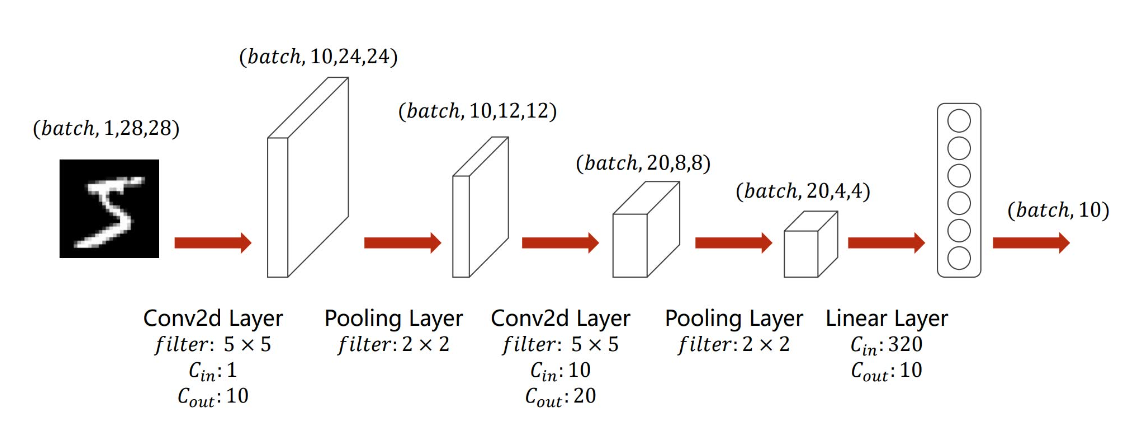

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        # Input channel, output channel, convolution kernel
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        # Pooling layer
        self.pooling = nn.MaxPool2d(2)
        # Linear layer
        self.fc = nn.Linear(320, 10)
        

    def forward(self, x):
        input_size = x.size(0)       # batch_size
        
        x = self.conv1(x)          # Convolutional layer  
        x = self.pooling(x)         # Pooling layer
        x = F.relu(x)            # activation function 
        
        x = self.conv2(x)          
        x = self.pooling(x)
        x = F.relu(x)            # activation function 
             
        x = x.view(input_size, -1)     # view: become 1-d，-1 automatically calc dimensions：20*10*10 = 2000
        x = self.fc(x)           # Determining numerical probabilities via a linear layer 
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                    train=True, 
                    transform=transforms.ToTensor(),  
                    download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                      train=False, 
                      transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                       batch_size=batch_size, 
                       shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                       batch_size=batch_size, 
                       shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        # Input channel, output channel, convolution kernel
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        # Pooling layer
        self.pooling = nn.MaxPool2d(2)
        # Linear layer
        self.fc = nn.Linear(320, 10)
        

    def forward(self, x):
        input_size = x.size(0)       # batch_size
        
        x = self.conv1(x)          # Convolutional layer  
        x = self.pooling(x)         # Pooling layer
        x = F.relu(x)            # activation function 
        
        x = self.conv2(x)          
        x = self.pooling(x)
        x = F.relu(x)            # activation function 
             
        x = x.view(input_size, -1)     # view: become 1-d，-1 automatically calc dimensions：20*10*10 = 2000
        x = self.fc(x)           # Determining numerical probabilities via a linear layer 
        return x

model = CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# # Train the model

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        # images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
        # images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.4029
Epoch [1/5], Step [200/600], Loss: 0.1985
Epoch [1/5], Step [300/600], Loss: 0.1620
Epoch [1/5], Step [400/600], Loss: 0.1480
Epoch [1/5], Step [500/600], Loss: 0.1219
Epoch [1/5], Step [600/600], Loss: 0.1369
Epoch [2/5], Step [100/600], Loss: 0.0619
Epoch [2/5], Step [200/600], Loss: 0.1644
Epoch [2/5], Step [300/600], Loss: 0.0895
Epoch [2/5], Step [400/600], Loss: 0.1002
Epoch [2/5], Step [500/600], Loss: 0.0684
Epoch [2/5], Step [600/600], Loss: 0.0889
Epoch [3/5], Step [100/600], Loss: 0.0876
Epoch [3/5], Step [200/600], Loss: 0.0867
Epoch [3/5], Step [300/600], Loss: 0.0419
Epoch [3/5], Step [400/600], Loss: 0.0530
Epoch [3/5], Step [500/600], Loss: 0.0506
Epoch [3/5], Step [600/600], Loss: 0.0173
Epoch [4/5], Step [100/600], Loss: 0.0249
Epoch [4/5], Step [200/600], Loss: 0.0472
Epoch [4/5], Step [300/600], Loss: 0.0904
Epoch [4/5], Step [400/600], Loss: 0.0305
Epoch [4/5], Step [500/600], Loss: 0.2000
Epoch [4/5], Step [600/600], Loss:

## References
1. https://www.researchgate.net/figure/Left-Fully-connected-network-with-one-hidden-layer-Each-arrow-represents-multiplication_fig8_320075165
3. https://www.bilibili.com/video/BV1Y7411d7Ys/?p=10&vd_source=b63df671d311b520be1035e151686519
4. https://blog.csdn.net/bit452/article/details/109690712